In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np
import tensorflow as tf

In [3]:
from utils.utils import load_data

FOLDER_PATH = "projekt2_data"

data_df = load_data(FOLDER_PATH, df_delimiter=",")
data_df.head(10)

,SentenceId,Phrase,Sentiment,df_
0,1,a series of escapades demonstrating the adage ...,1,0
1,1,a series of escapades demonstrating the adage ...,2,0
2,1,a series,2,0
3,1,a,2,0
4,1,series,2,0
5,1,of escapades demonstrating the adage that what...,2,0
6,1,of,2,0
7,1,escapades demonstrating the adage that what is...,2,0
8,1,escapades,2,0
9,1,demonstrating the adage that what is good for ...,2,0


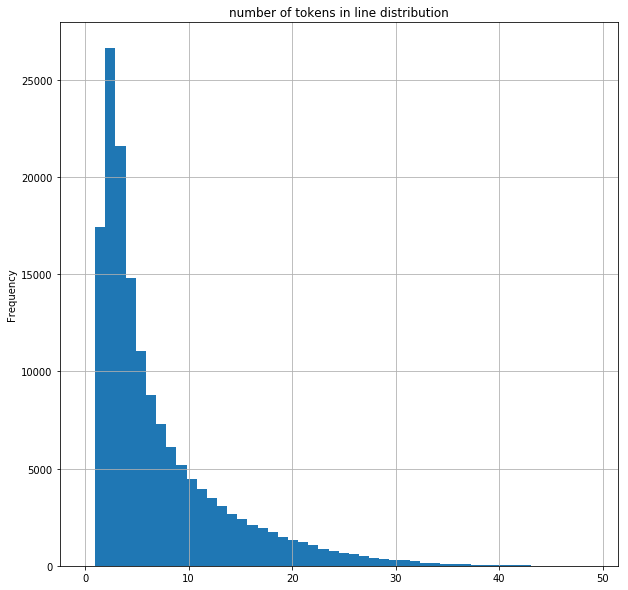

In [4]:
data_df["Phrase"].str.split().str.len().plot(kind="hist", title="number of tokens in line distribution", grid=True, figsize=(10,10), bins=50);

# USE

In [5]:
from preprocess_data.preprocess_data import preprocess_data_word
from utils.utils_result import save_report, update_fit_params, evaluation

Using TensorFlow backend.


In [ ]:
# preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test), data = preprocess_data_word(data_df, x_label="Phrase", y_label="Sentiment", max_len_seq=50)

In [ ]:
# general parameter setting
tensorboard_params = None

fit_params = {
    "x": x_train,
    "y": y_train,
    "epochs": 50,
    "batch_size": 64,
    "validation_data": (x_val, y_val) 
}

input_params = {
    "shape": (1,),
    "dtype": tf.string
}

test_result_dict = {}

## Phrase Level FFNN

In [8]:
from architecture.models import model_ffnn

W0529 12:24:31.079313 140265220859776 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [9]:
# parameters setting
use_params_ffnn = {
    "trainable": True,
    "output_dim": 512
}

params_use_raw = {
    "input_layer": "simple_input",
    "emb_layer": "USE",
    "input_params": input_params,
    "emb_params": use_params_ffnn,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_use_ffnn"
model_use_ffnn = model_ffnn(params_use_raw)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Instructions for updating:
Colocations handled automatically by placer.


W0529 12:24:35.377940 140265220859776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0529 12:24:36.991383 140265220859776 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0529 12:24:37.203354 140265220859776 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 139999 samples, validate on 7800 samples
Instructions for updating:
Use tf.cast instead.


W0529 12:24:59.909473 140265220859776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
139999/139999 [==============================] - 448s 3ms/sample - loss: 0.9392 - acc: 0.6193 - val_loss: 1.1082 - val_acc: 0.5133
Epoch 2/50
139999/139999 [==============================] - 435s 3ms/sample - loss: 0.7846 - acc: 0.6751 - val_loss: 2.0671 - val_acc: 0.2037
Epoch 3/50
139999/139999 [==============================] - 435s 3ms/sample - loss: 0.7285 - acc: 0.6970 - val_loss: 1.1345 - val_acc: 0.5897
Epoch 4/50
139999/139999 [==============================] - 440s 3ms/sample - loss: 0.6931 - acc: 0.7105 - val_loss: 1.0699 - val_acc: 0.5892
Epoch 5/50
139999/139999 [==============================] - 434s 3ms/sample - loss: 0.6654 - acc: 0.7195 - val_loss: 1.1410 - val_acc: 0.5744
Epoch 6/50
139999/139999 [==============================] - 435s 3ms/sample - loss: 0.6441 - acc: 0.7292 - val_loss: 1.8178 - val_acc: 0.5356
Epoch 7/50
139999/139999 [==============================] - 442s 3ms/sample - loss: 0.6215 - acc: 0.7378 - val_loss: 1.0690 - val_acc: 0.5609
Epoch 

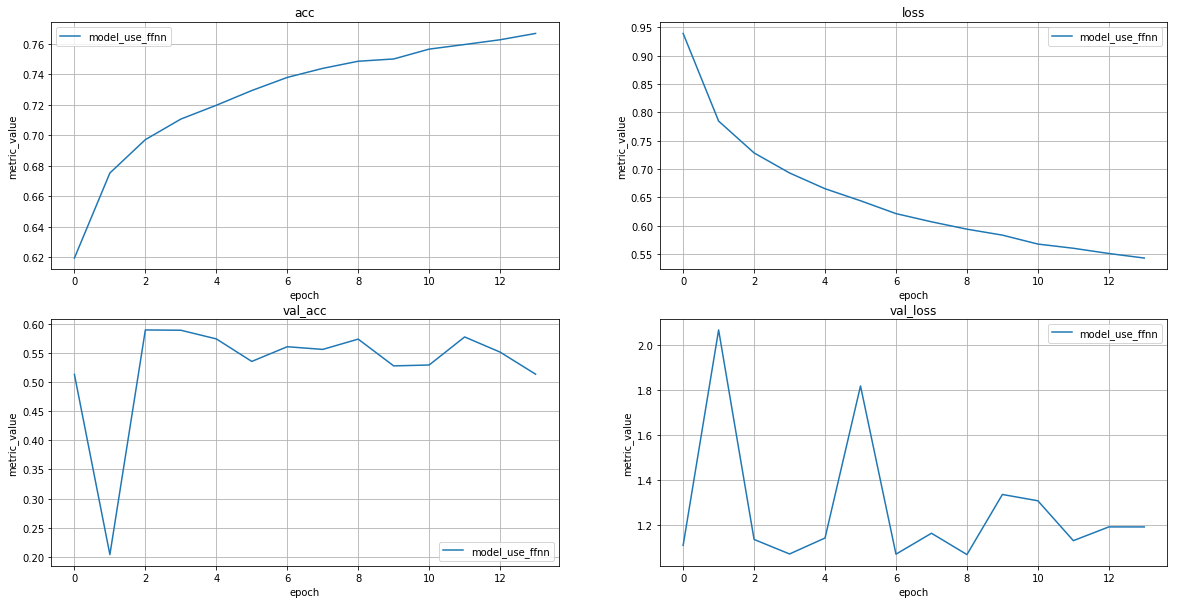

In [11]:
# training
model_use_ffnn.fit(**fit_params);
model_use_ffnn = save_report(model=model_use_ffnn, model_name=model_name, markered_path=markered_path)

In [12]:
# evaluation
test_result_dict = evaluation(model=model_use_ffnn, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_use_ffnn, to 0.5703
